In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import folium       

In [2]:
data_file  = pd.read_csv("zomato.csv",encoding="ISO-8859-1")
(data_file.head())


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
print(data_file.shape)
data_file.dropna(inplace=True)
data_file.isnull().sum()

(9551, 21)


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

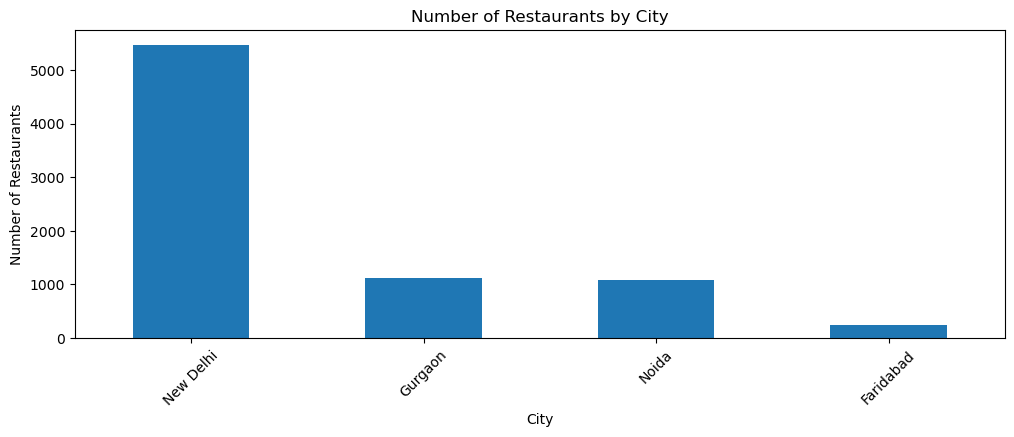

In [5]:
city_counts = data_file['City'].value_counts().head(4)  
plt.figure(figsize=(12, 4))
city_counts.plot(kind='bar')
plt.title('Number of Restaurants by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

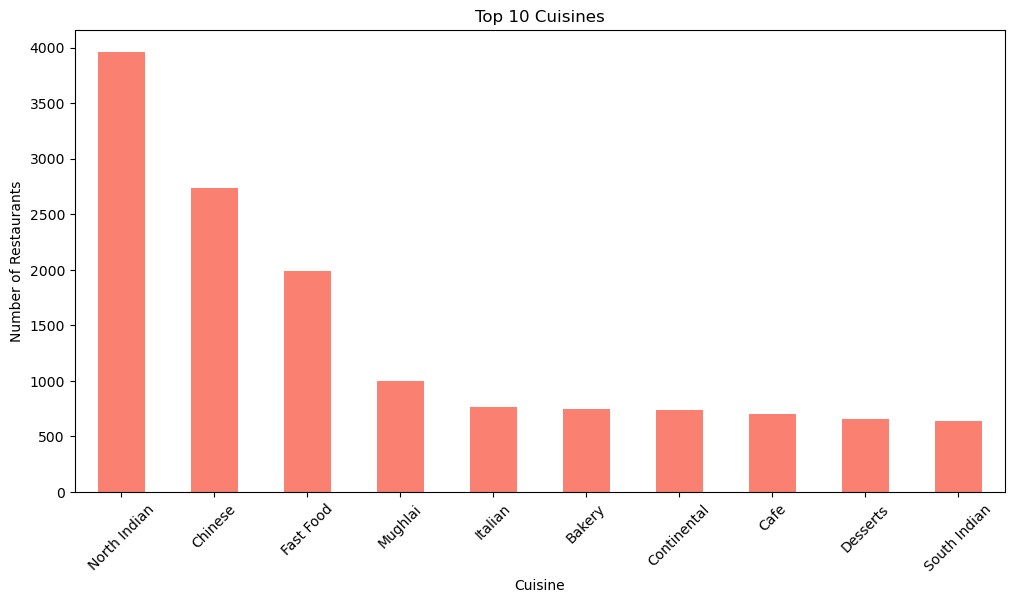

In [6]:
cuisine_counts = data_file['Cuisines'].str.split(',').explode().str.strip().value_counts().head(10)
plt.figure(figsize=(12, 6))
cuisine_counts.plot(kind='bar', color='salmon')
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

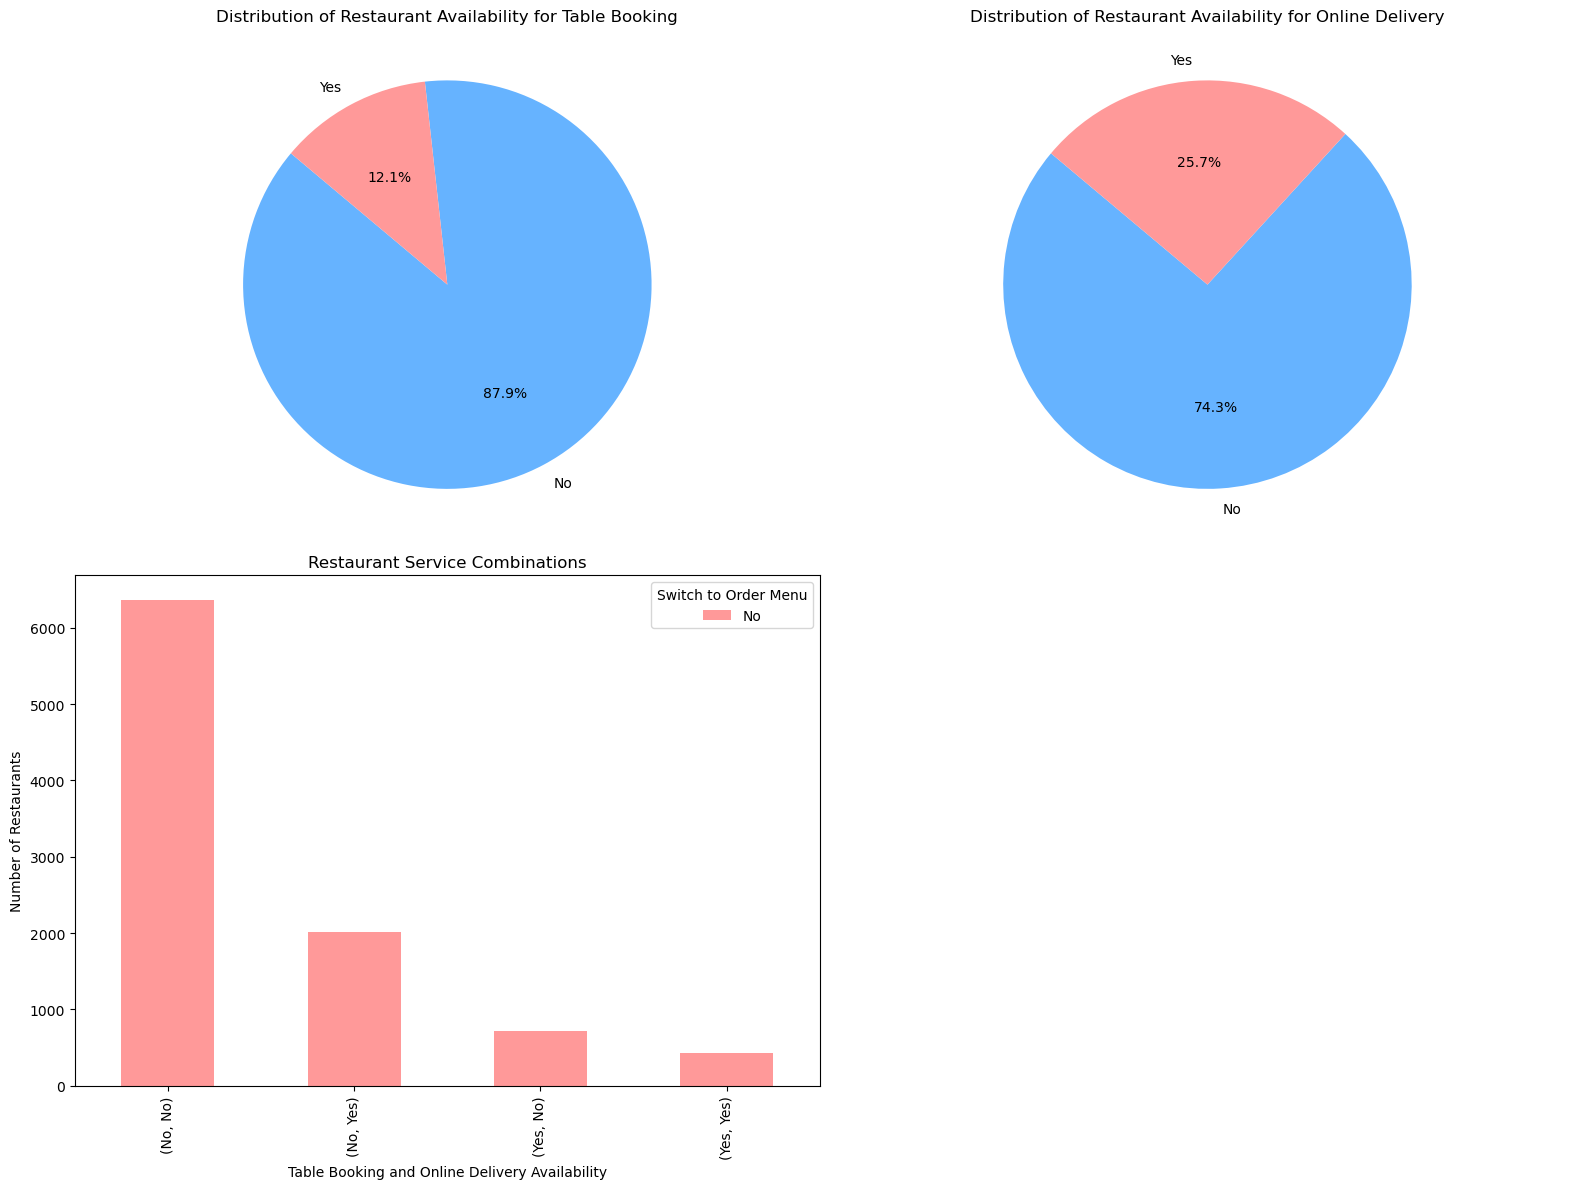

In [7]:
table_booking_counts = data_file['Has Table booking'].value_counts()
online_delivery_counts = data_file['Has Online delivery'].value_counts()
service_combinations = data_file.groupby(['Has Table booking', 'Has Online delivery', 'Switch to order menu']).size().unstack(fill_value=0).stack().reset_index(name='Count')
pivot_table = service_combinations.pivot_table(index=['Has Table booking', 'Has Online delivery'], columns='Switch to order menu', values='Count', fill_value=0)
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs[0, 0].pie(table_booking_counts, labels=table_booking_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
axs[0, 0].set_title('Distribution of Restaurant Availability for Table Booking')
axs[0, 1].pie(online_delivery_counts, labels=online_delivery_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
axs[0, 1].set_title('Distribution of Restaurant Availability for Online Delivery')
pivot_table.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], ax=axs[1, 0])
axs[1, 0].set_title('Restaurant Service Combinations')
axs[1, 0].set_xlabel('Table Booking and Online Delivery Availability')
axs[1, 0].set_ylabel('Number of Restaurants')
axs[1, 0].legend(title='Switch to Order Menu')
axs[1, 1].axis('off')
plt.tight_layout()
plt.show()

C:\Users\divyansh\AppData\Local\Temp\ipykernel_3904\4016643844.py:13: UserWarning: Glyph 140 (\x8c) missing from current font.
  plt.tight_layout()
c:\Users\divyansh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


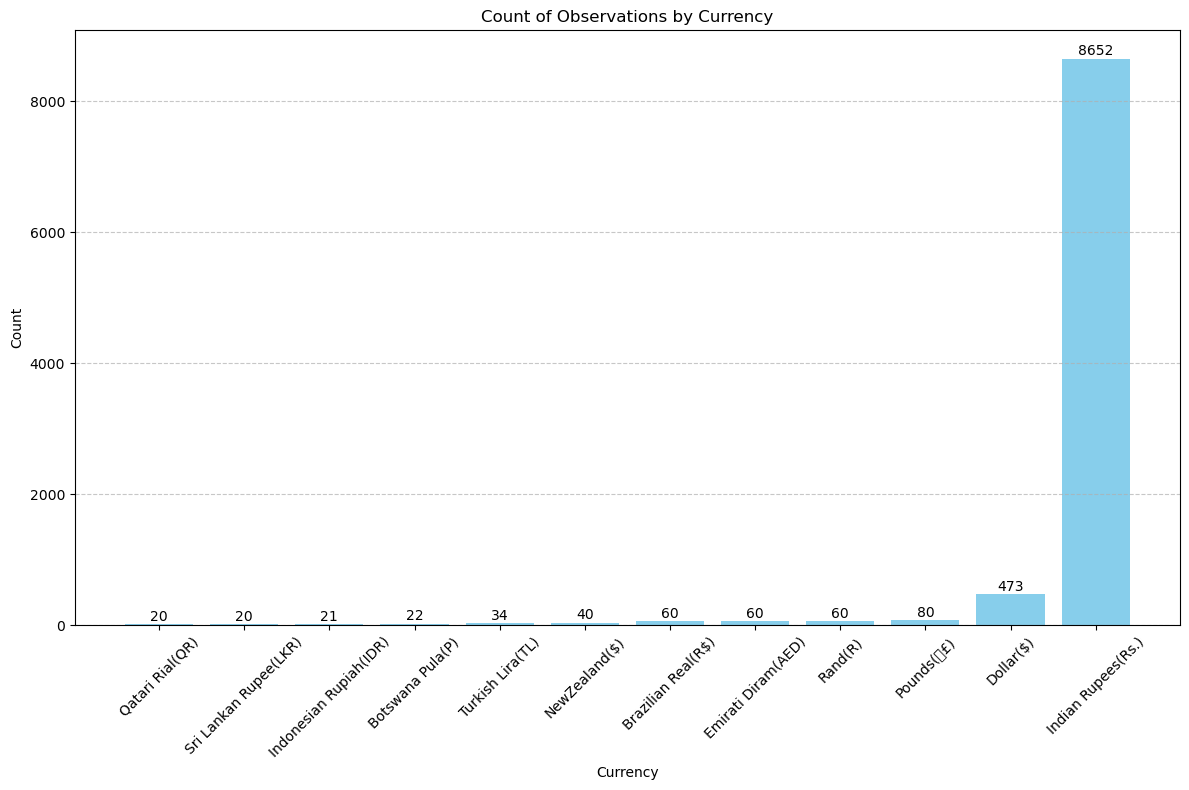

In [8]:
count_by_currency = data_file['Currency'].value_counts().sort_values()
currencies = count_by_currency.index
counts = count_by_currency.values
plt.figure(figsize=(12, 8))
plt.bar(currencies, counts, color='skyblue')
plt.title('Count of Observations by Currency')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(counts):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

#### <b>This represents average cost of a meal for people at a restaurant

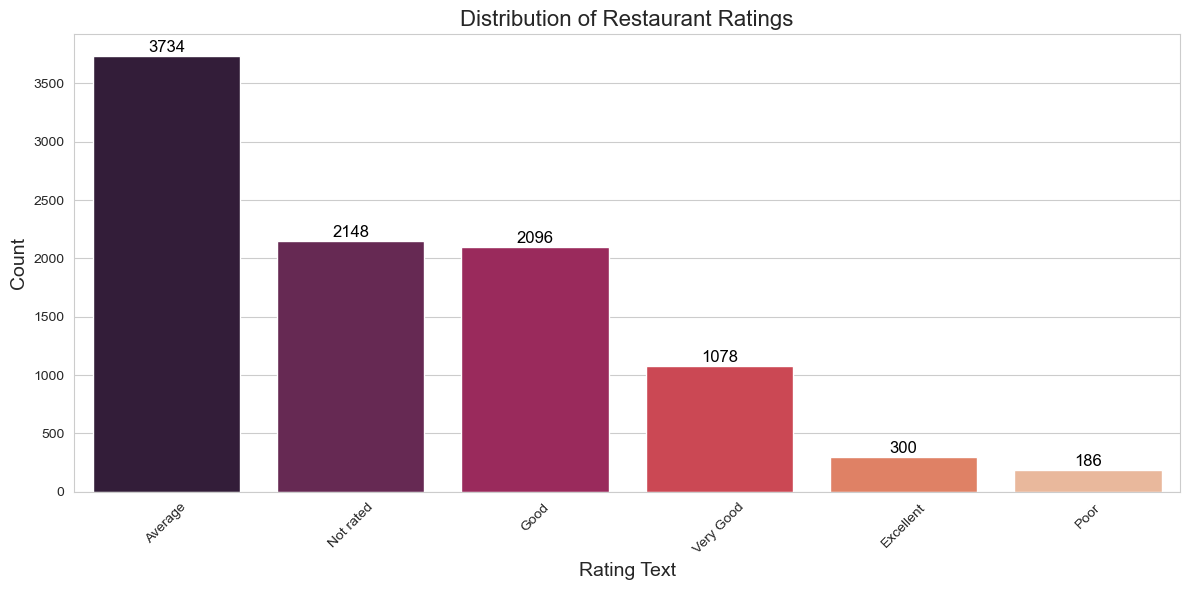

In [9]:
rating_counts = data_file['Rating text'].value_counts()
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
bars = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='rocket')
for bar, value in zip(bars.patches, rating_counts.values):
    bars.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, f'{value}', 
              ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Restaurant Ratings', fontsize=16)
plt.xlabel('Rating Text', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\divyansh\AppData\Local\Temp\ipykernel_3904\3756073248.py:11: UserWarning: Glyph 140 (\x8c) missing from current font.
  plt.tight_layout()
c:\Users\divyansh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


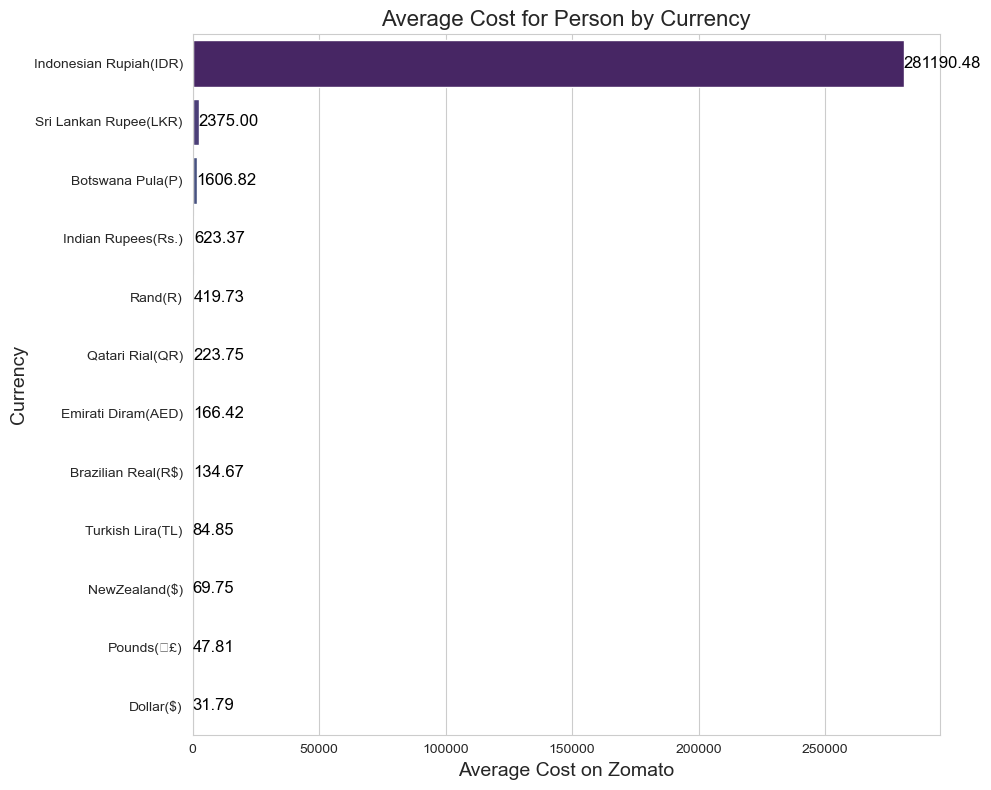

In [10]:
avg_cost_by_currency = data_file.groupby('Currency')['Average Cost for two'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
bars = sns.barplot(x=avg_cost_by_currency.values, y=avg_cost_by_currency.index, palette='viridis')
for bar, value in zip(bars.patches, avg_cost_by_currency.values):
    bars.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2, f'{value:.2f}', 
              va='center', fontsize=12, color='black')
plt.title('Average Cost for Person by Currency', fontsize=16)
plt.xlabel('Average Cost on Zomato', fontsize=14)
plt.ylabel('Currency', fontsize=14)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error ,classification_report,accuracy_score,mean_absolute_error,r2_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [12]:
binary_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
for column in binary_columns:
    data_file[column] = data_file[column].replace({'Yes': 1, 'No': 0})

print("Encoded values for 'Has Online delivery':", data_file['Has Online delivery'].unique())

Encoded values for 'Has Online delivery': [0 1]


##### <b>Predicted restaurent Ratings Based on the features_rating

In [13]:
features_rating = ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes']  # Only numeric columns
target_rating = 'Aggregate rating'
X_rating = data_file[features_rating]
y_rating = data_file[target_rating]
X_train, X_test, y_train, y_test = train_test_split(X_rating, y_rating, test_size=0.2)
print(X_train.dtypes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rating_model = RandomForestRegressor()
rating_model.fit(X_train_scaled, y_train)
y_pred = rating_model.predict(X_test_scaled)
print("\n")
print("Predictions are :",y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Longitude               float64
Latitude                float64
Average Cost for two      int64
Price range               int64
Votes                     int64
dtype: object


Predictions are : [3.484 3.197 2.913 ... 3.768 2.921 3.896]
Mean Squared Error: 0.10


Mean Squared Error: 0.10
Mean Absolute Error: 0.20
R-squared: 0.96


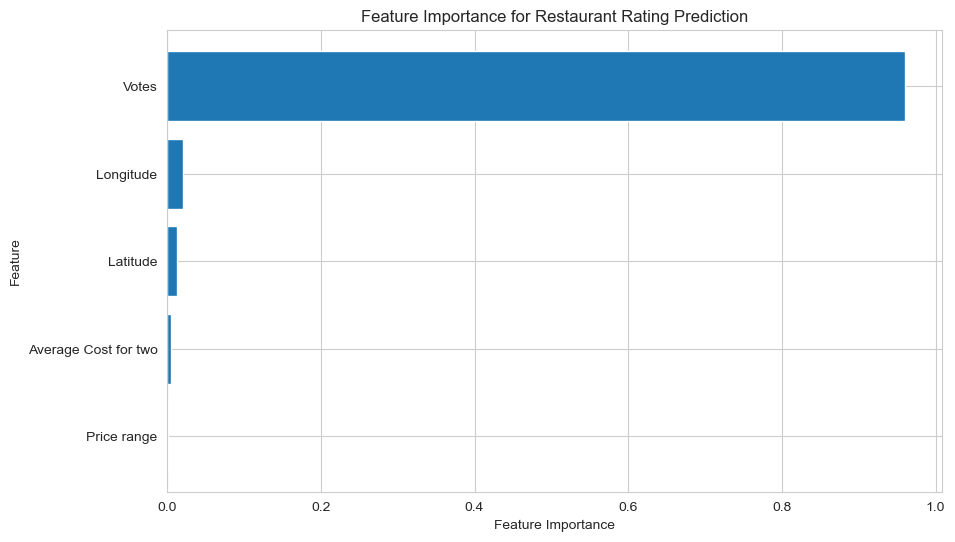

In [14]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rating_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

feature_importances = best_model.feature_importances_
features = X_rating.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Restaurant Rating Prediction')
plt.gca().invert_yaxis()
plt.show()



In [15]:
map_center = [data_file['Latitude'].mean(), data_file['Longitude'].mean()]  
restaurant_map = folium.Map(location=map_center, zoom_start=12)
for index, row in data_file.iterrows():
    rating = row['Aggregate rating']
    lat, lon = row['Latitude'], row['Longitude']
    popup_text = f"Restaurant: {row['Restaurant Name']}<br>Rating: {rating}<br>City: {row['City']}<br>Address: {row['Address']}"
    marker = folium.Marker([lat, lon], popup=popup_text)
    marker.add_to(restaurant_map)
restaurant_map.save('restaurant_ratings_map.html')
print("Map saved as 'restaurant_ratings_map.html'")

# Display the map
# restaurant_map

Map saved as 'restaurant_ratings_map.html'


In [16]:
scaler = StandardScaler()
features_segmentation = ['Average Cost for two', 'Aggregate rating', 'Votes', 'Price range']
features_recommendation = ['Cuisines', 'Average Cost for two', 'Aggregate rating', 'City', 'Price range']
X_segmentation = data_file[features_segmentation]
X_segmentation_scaled = scaler.fit_transform(X_segmentation)
kmeans = KMeans(n_clusters=5, random_state=42)
data_file['Cluster'] = kmeans.fit_predict(X_segmentation_scaled)
print("Cluster centers:", kmeans.cluster_centers_)

Cluster centers: [[ 0.02284711  0.71756383  0.27062109  1.64162245]
 [-0.0478302   0.41430884 -0.14795097 -0.34583404]
 [-0.05393398 -1.75748353 -0.36241404 -0.64504368]
 [21.42041854  1.13952277  1.65642285  1.31972596]
 [ 0.04565189  1.02679512  5.02448636  1.18299776]]


c:\Users\divyansh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


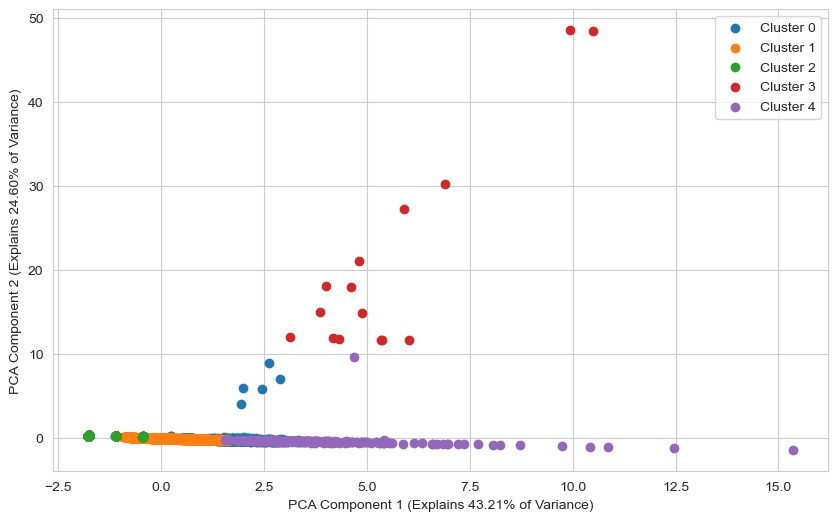

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_segmentation_scaled)

plt.figure(figsize=(10, 6))
for cluster in range(5):
    plt.scatter(X_pca[data_file['Cluster'] == cluster, 0], X_pca[data_file['Cluster'] == cluster, 1], label=f'Cluster {cluster}')
variance_explained = pca.explained_variance_ratio_

plt.xlabel(f'PCA Component 1 (Explains {variance_explained[0]*100:.2f}% of Variance)')
plt.ylabel(f'PCA Component 2 (Explains {variance_explained[1]*100:.2f}% of Variance)')
plt.legend()
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
features_svm = ['Average Cost for two', 'Price range', 'Votes']  
target_svm = 'Rating text'  
X_svm = data_file[features_svm]
y_svm = data_file[target_svm]
le = LabelEncoder()
y_svm = le.fit_transform(y_svm)

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.2)

scaler = StandardScaler()
X_train_svm_scaled = scaler.fit_transform(X_train_svm)
X_test_svm_scaled = scaler.transform(X_test_svm)

svm_model = SVC(kernel='linear')  
svm_model.fit(X_train_svm_scaled, y_train_svm)

y_pred_svm = svm_model.predict(X_test_svm_scaled)
accuracy = accuracy_score(y_test_svm, y_pred_svm)
print(f'SVM Accuracy: {accuracy:.2f}')

features_regression = ['Average Cost for two', 'Price range', 'Votes'] 
target_regression = 'Aggregate rating'  

X_regression = data_file[features_regression]
y_regression = data_file[target_regression]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

linreg_model = LinearRegression()
linreg_model.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = linreg_model.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Linear Regression Mean Squared Error: {mse:.2f}')


SVM Accuracy: 0.58
Linear Regression Mean Squared Error: 1.72


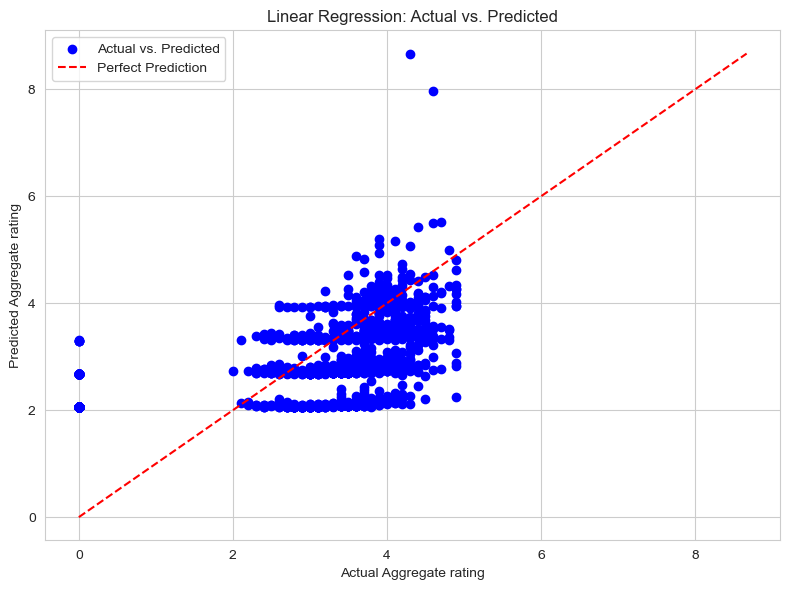

In [19]:
plt.figure(figsize=(8, 6))

# Scatter plot for actual vs. predicted values
plt.scatter(y_test_reg, y_pred_reg, color='blue', label='Actual vs. Predicted')

# Plotting the perfect prediction line
min_val = min(np.min(y_test_reg), np.min(y_pred_reg))
max_val = max(np.max(y_test_reg), np.max(y_pred_reg))
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red', label='Perfect Prediction')

plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Aggregate rating')
plt.ylabel('Predicted Aggregate rating')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


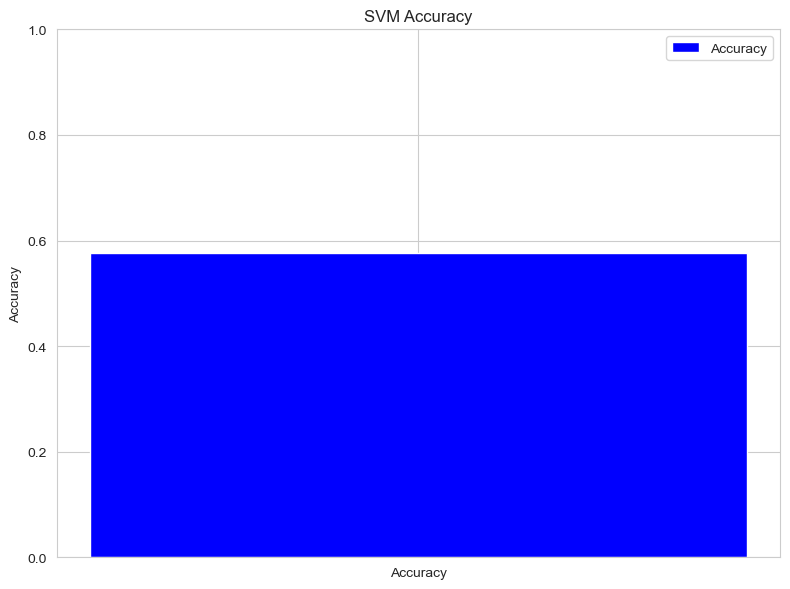

In [20]:
plt.figure(figsize=(8, 6))
plt.bar(['Accuracy'], [accuracy], color='blue', label='Accuracy')
plt.title('SVM Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
